## &#128205; Basic Setups

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys


import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

**쥬피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함**

In [3]:
import matplotlib.pyplot as plt 
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

### 어떤 데이터를 사용할건가?
원래는 크롤링한 데이터를 활용해 시각화를 할 계획이었습니다!
그런데...

가장 시각화 하기에 적절한 박스오피스 데이터의 경우 100개를 넘어가는 순간 마이너한 영화들이 많이 나오고,

분포가 고르지 않고 시각화했을 때 예쁘게 안 나오더라고요.

예를 들면, 이런식으로 나옵니다.
![%EC%BA%A1%EC%B2%982.PNG](attachment:%EC%BA%A1%EC%B2%982.PNG)
![%EC%BA%A1%EC%B2%98.PNG](attachment:%EC%BA%A1%EC%B2%98.PNG)

#### 그래서 데이터는 지난 시간 EDA에서 활용한 'nyc_citibike.csv'를 활용해서 해볼게요!!

## &#128205; 1. 데이터프레임 확인

In [4]:
df=pd.read_csv("nyc_citibike.csv",encoding='euc-kr') # 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


In [5]:
# 변수 타입 파악
df.dtypes 

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

#### 시각화에서 중요한 건 범주형변수, 연속형변수 두가지로 구분하고 시작하는 것 (한 번 더 복습!)
> 범주형 변수 : 빈도(frequency) 계산 가능 <br/>
> 연속형 변수 : 평균, 표준편차, 분산 등의 수학적 계산 가능


- dtypes로 전체 변수 타입을 확인할때, 범주형이어도 연속형 변수 dtype일 수 있다 <br/>
- 이 예시에서는 trip_duration, day_since_register 연속형 변수, 그 외는 다 범주형<br/>
- 실제로 연속형이 아닌데, int64(연속형)인 변수들을 string으로 만들어준다

In [6]:
df['start_station_id']=df['start_station_id'].astype(str)
df['end_station_id']=df['end_station_id'].astype(str)
df['bike_id']=df['bike_id'].astype(str)

In [7]:
# trip_duration을 minute 단위로 바꿔주기 
df['trip_duration_min']=df['trip_duration'] /60

In [8]:
df.dtypes

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
trip_duration_min          float64
dtype: object

In [9]:
#이상치도 제거해버리자. (y값의 최상위 1% 제거)
cut_point = df["trip_duration_min"].quantile(0.99) # 상위 99% 값을 cut_point로 지정
df_cut=df[df['trip_duration_min'] < cut_point]

## &#128205; 2. 이진 변수 시각화
두 변수간의 관계를 살피기 위해 시각화해보자!


### 2.1 연속형 변수 - 연속형 변수 관계

#### 2.1.1 Scatterplot
Pandas Visualization 활용

<Figure size 720x360 with 0 Axes>

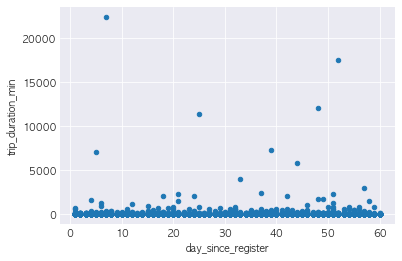

In [10]:
# pandas dataframe의 함수 plot()
plt.figure(figsize=(10,5))
df.plot.scatter(x='day_since_register',y='trip_duration_min')
plt.show()

#### 2.1.2 Scatterplot with Regression fit
Seaborn 활용

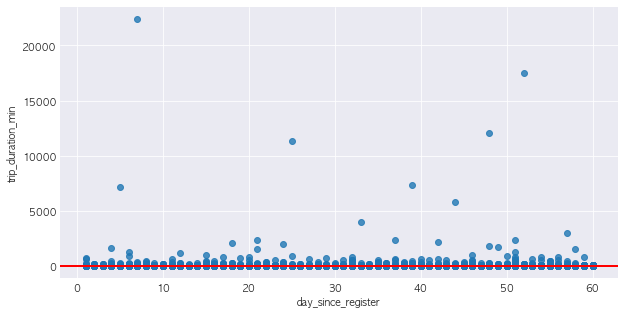

In [11]:
plt.figure(figsize=(10,5))
reg=sns.regplot(x=df['day_since_register'],y=df['trip_duration_min'],
                line_kws={"color":"red","lw":2})
plt.show()



**해석 보태기**
>어떤 해석이 가능할까요?






### 2.2 범주형 변수 - 범주형 변수 관계

seaborn countplot 활용 누적 막대 그래프<br/>
**변수 1 IN x축 or y축 하나 / 변수 2 IN hue(색상)**

[Countplot 링크](https://seaborn.pydata.org/generated/seaborn.countplot.html)

**A. Vertical Countplot 은 x명시**

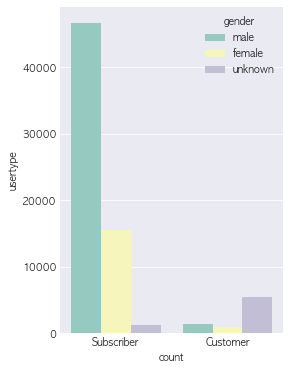

In [12]:
# 성별 gender 별 usertype 분포
plt.figure(figsize=(4,6))
cnt=sns.countplot(x='usertype',hue='gender',data=df_cut,palette='Set3')
cnt.set_xlabel("count")
cnt.set_ylabel("usertype")
plt.show()

**해석 보태기**
> 구독자가 아닌 일시적인 Customer에는 성별조차 등록하지 않은 멤버가 많다.

**B. Horizontal Countplot 은 y명시**

In [13]:
# 상위 10개 시작 지점으로 시작된 기록 건수만 남겨 df_top으로 생성
top_list=df_cut['start_station_name'].value_counts().nlargest(10).index
df_top=df_cut[df_cut['start_station_name'].isin(top_list)]

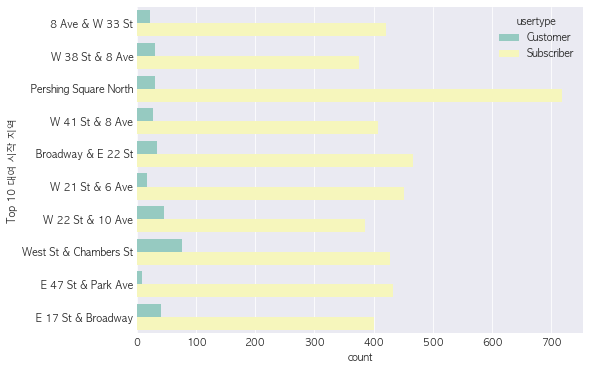

In [14]:
# 상위 대여시작지점 별 usertype 분포
plt.figure(figsize=(8,6))
cnt=sns.countplot(y='start_station_name',hue='usertype',data=df_top,palette='Set3')
cnt.set_xlabel("count")
cnt.set_ylabel("Top 10 대여 시작 지역")
plt.show()

**해석 보태기**
> 어떤 해석이 가능할까요?

### 2.3 범주형 변수 - 연속형 변수 관계
#### 2.3.1 범주형 변수가 10개 이하
**A. seaborn의 boxplot**

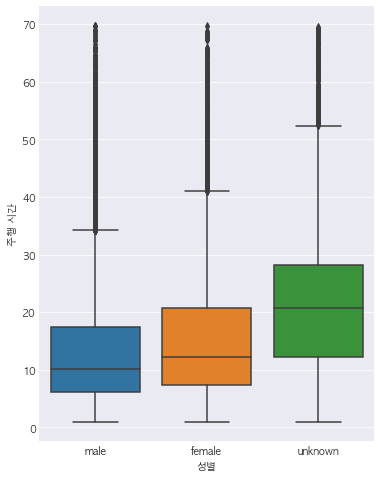

In [24]:
# 성별 gender 와 주행 시간 trip_duration
plt.figure(figsize=(6,8))
box=sns.boxplot(x='gender',y='trip_duration_min',data=df_cut)
box.set_xlabel("성별")
box.set_ylabel("주행 시간")
plt.show()

**B. seaborn의 catplot, 그 안의 box 또는 boxen** <br/>
kind='boxen'을 kind='box'로 변경하실 수 있습니다
<br/> boxen 그래프는 boxplot에서 **더 많은 정보를 담는 신상 그래프**입니다

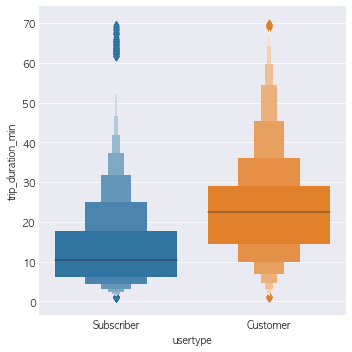

In [16]:
# Usertype 과 주행 시간 trip_duration
sns.catplot(x='usertype',y='trip_duration_min', kind='boxen',data=df_cut)
plt.show()

**해석 보태기**
>어떤 해석이 가능할까요? [박스플랏 해석방법](https://codedragon.tistory.com/7012)

#### 4.3.2 범주형 변수가 10개 이상
범주형 변수의 고유값이 많을 때, 상위 또는 하위 n개로 자르고 Horizontal로 시각화

In [19]:
# 상위 10개 시작 지점으로 시작된 기록 건수만 남겨 df_top으로 생성
top_list=df_cut['start_station_name'].value_counts().nlargest(10).index
top_list


Index(['Pershing Square North', 'West St & Chambers St', 'Broadway & E 22 St',
       'W 21 St & 6 Ave', '8 Ave & W 33 St', 'E 17 St & Broadway',
       'E 47 St & Park Ave', 'W 41 St & 8 Ave', 'W 22 St & 10 Ave',
       'W 38 St & 8 Ave'],
      dtype='object')

In [23]:
df_top=df_cut[df_cut['start_station_name'].isin(top_list)]
df_top['start_station_name'].unique()
df_top

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register,trip_duration_min
6,2018-05-01,2018-05-01,3,4,2102,490,8 Ave & W 33 St,40.751551,-73.993934,387,Centre St & Chambers St,40.712733,-74.004607,33314,Customer,1970,male,41,35.033333
33,2018-05-01,2018-05-01,1,2,1856,523,W 38 St & 8 Ave,40.754666,-73.991382,499,Broadway & W 60 St,40.769155,-73.981918,17240,Customer,1983,male,30,30.933333
50,2018-05-01,2018-05-01,4,4,642,519,Pershing Square North,40.751873,-73.977706,3142,1 Ave & E 62 St,40.761227,-73.960940,32414,Subscriber,1989,male,24,10.700000
103,2018-05-01,2018-05-01,2,2,845,519,Pershing Square North,40.751873,-73.977706,504,1 Ave & E 16 St,40.732219,-73.981656,25781,Subscriber,1992,male,11,14.083333
114,2018-05-01,2018-05-01,3,3,327,477,W 41 St & 8 Ave,40.756405,-73.990026,508,W 46 St & 11 Ave,40.763414,-73.996674,15064,Subscriber,1980,male,20,5.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71989,2018-05-01,2018-05-01,23,23,1951,497,E 17 St & Broadway,40.737050,-73.990093,251,Mott St & Prince St,40.723180,-73.994800,20306,Customer,1969,unknown,9,32.516667
71999,2018-05-01,2018-05-01,22,23,1656,497,E 17 St & Broadway,40.737050,-73.990093,3002,South End Ave & Liberty St,40.711512,-74.015756,16403,Subscriber,1980,male,43,27.600000
72001,2018-05-01,2018-05-01,23,23,534,402,Broadway & E 22 St,40.740343,-73.989551,3263,Cooper Square & Astor Pl,40.729515,-73.990753,21005,Subscriber,1981,female,23,8.900000
72020,2018-05-01,2018-05-01,23,23,266,435,W 21 St & 6 Ave,40.741740,-73.994156,453,W 22 St & 8 Ave,40.744751,-73.999154,19687,Subscriber,1989,male,60,4.433333


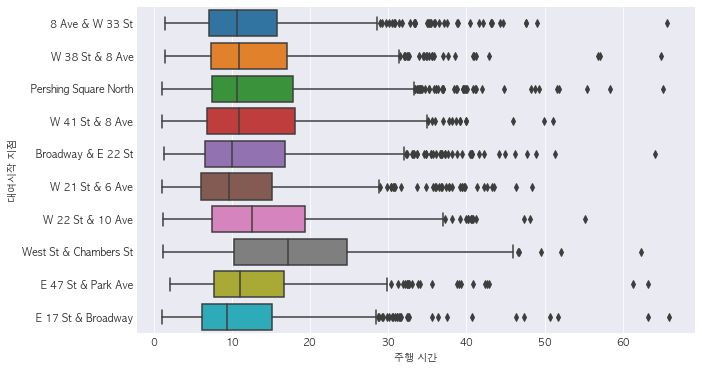

In [22]:
plt.figure(figsize=(10,6))
box=sns.boxplot(y='start_station_name',x='trip_duration_min',data=df_top)
box.set_xlabel("주행 시간")
box.set_ylabel("대여시작 지점")
plt.show()

**해석 보태기**
> West St & Chambers St 에서 유난히 주행시간 평균이 높고, 넓게 퍼져 있다. <br/> 더불어 건수도 상위2위로 많으니, 여기에 바이크를 더 배치해놓는 액션을 하자! <br/>[박스플랏 해석방법](https://codedragon.tistory.com/7012)

## &#128205; 3. 3개 이상의 변수 분석

### 3.1 버블도(Bubble Scatter Chart, Bubble Plot)
일반 scatterplot처럼 x와 y의 관계를 나타내지만,<br/>
**버블의 크기 또는 색상**이 또 하나의 정보로 표시됨.<br/>
크기, 색상 둘다 추가해서 **총 x,y,크기,색상의 4변수 그래프 가능하다** 하지만 정보가 과하면 안 좋은 시각화임을 유의할 것! <br/>
[Bubble Chart various types with Python](https://python-graph-gallery.com/bubble-plot/) <br/>
[3개 이상 변수를 시각화하는 4가지 방법](https://m.blog.naver.com/PostView.nhn?blogId=jiehyunkim&logNo=220822154180&proxyReferer=https%3A%2F%2Fwww.google.com%2F)

**상위 top 10개 시작 지역 / 시작 시간대별 / 주행 시간**

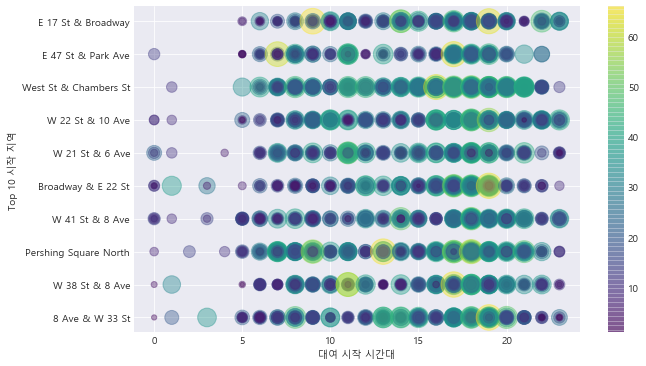

In [0]:
plt.figure(figsize=(10,6))
plt.scatter(df_top['start_hour'], # x축
            df_top['start_station_name'], # y축
            c=df_top['trip_duration_min'], # 색상
            s=10*df_top['trip_duration_min'], # 사이즈 
            # 10을 곱해본 이유는 그래프 사이즈에 맞게 원의 지름을 키워주기 위함
            alpha=0.4, # 투명도
            cmap='viridis') # 컬러바 종류
plt.colorbar()
plt.ylabel('Top 10 시작 지역')
plt.xlabel('대여 시작 시간대')
# plt.xticks(rotation=90) # x축에 종류가 많으면 label 돌려주기
plt.show()

**해석 보태기**
> 변수가 더 낄수록 보기 어려워짐. 
> <br/>일단 이 그래프는 보통 수요가 없는 새벽 시간대에도 Broadway & E 22 St, W 38 St & 8 Ave 쪽에서 꽤 주행 시간이 긴 수요가 발생하고 있다고 이해해볼 수 있다.

### 3.2 히트맵(Heatmap)의 스마트한 활용
heatmap은 실전에서 잘 쓰이고, 직관적이다 
<br/> 위 그래프를 히트맵으로 그려봄

**상위 top 10개 시작 지역 / 시작 시간대별 / 주행 시간**

In [0]:
# 핵심은 groupby
base=df_top.groupby(['start_station_name','start_hour'])['bike_id'].count().unstack()
base

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_station_name,,,,,,,,,,,,,,,,,,,,,
8 Ave & W 33 St,1.0,1.0,NaN,1.0,NaN,12.0,23.0,21.0,45.0,34.0,...,9.0,19.0,23.0,53.0,53.0,48.0,17.0,21.0,15.0,5.0
Broadway & E 22 St,5.0,1.0,NaN,2.0,NaN,1.0,5.0,9.0,32.0,16.0,...,26.0,20.0,30.0,74.0,133.0,67.0,15.0,8.0,6.0,1.0
E 17 St & Broadway,NaN,NaN,NaN,NaN,NaN,2.0,7.0,11.0,17.0,26.0,...,30.0,21.0,36.0,56.0,54.0,41.0,28.0,7.0,16.0,9.0
E 47 St & Park Ave,1.0,NaN,NaN,NaN,NaN,5.0,11.0,36.0,34.0,14.0,...,6.0,12.0,34.0,116.0,97.0,30.0,8.0,1.0,2.0,NaN
Pershing Square North,1.0,NaN,1.0,NaN,1.0,6.0,9.0,57.0,99.0,72.0,...,17.0,27.0,39.0,100.0,128.0,62.0,20.0,18.0,9.0,3.0
W 21 St & 6 Ave,3.0,1.0,NaN,NaN,1.0,NaN,9.0,22.0,30.0,29.0,...,17.0,23.0,30.0,46.0,71.0,34.0,20.0,22.0,2.0,8.0
W 22 St & 10 Ave,2.0,1.0,NaN,NaN,NaN,4.0,3.0,20.0,35.0,32.0,...,19.0,13.0,34.0,30.0,65.0,28.0,29.0,23.0,26.0,8.0
W 38 St & 8 Ave,1.0,1.0,NaN,NaN,NaN,2.0,20.0,8.0,37.0,42.0,...,18.0,17.0,17.0,53.0,61.0,43.0,11.0,10.0,9.0,4.0
W 41 St & 8 Ave,5.0,1.0,NaN,2.0,NaN,38.0,29.0,10.0,21.0,31.0,...,16.0,14.0,11.0,51.0,76.0,42.0,25.0,16.0,7.0,7.0


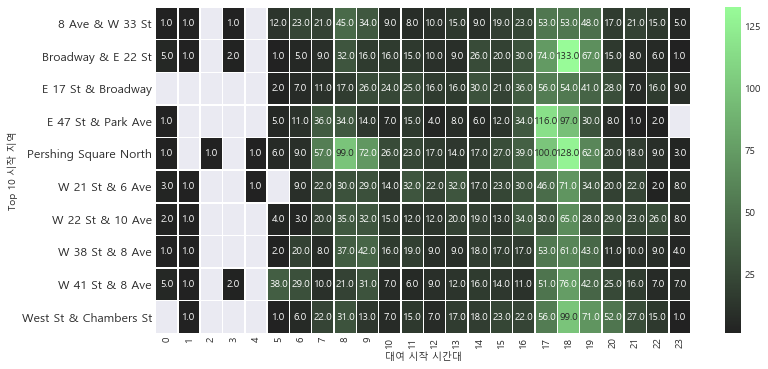

In [0]:
fig, ax = plt.subplots(figsize=(12,6))
pal = sns.dark_palette("palegreen", as_cmap=True) # color palette 설정, as_cmap은 true일 경우 matplotlib colormap object를 반환
sns.heatmap(base, 
            annot=True, # 셀에 숫자 표기
            ax=ax, # 위에서 만들어 둔 캔버스의 (Matplotlib) Axes
            linewidths=.5, # 셀을 나눌 선의 너비
            fmt='.1f', # 주석 추가
           cmap=pal) # 소수점 자리 처리
plt.ylabel('Top 10 시작 지역')
plt.xlabel('대여 시작 시간대') 
plt.xticks(rotation=90) 
plt.yticks(fontsize=12)# x축에 종류가 많으니까 label 돌려주기
plt.show()

# heatmap 파라미터 설명은 링크 참고! https://seaborn.pydata.org/generated/seaborn.heatmap.html 

# heatmap이 아래 위로 잘린다면 현 matplotlib 3.1.1 의 오류
# This was a matplotlib regression introduced in 3.1.1 which has been fixed in 3.1.2 (still forthcoming). 
# For now the fix is to downgrade matplotlib to a prior version.

**해석 보태기**
> 어떤 해석이 가능할까요?

## &#128205; 4. Folium(지도 시각화)

In [0]:
!{sys.executable} -m pip install folium
import folium

### STEP 1. 빈 캔버스 역할을 하는 지도를 그린다

In [0]:
# 함수를 만들어서 지도를 만들어보자
def generateBaseMap(default_location=[40.746176, -73.996453], 
                    default_zoom_start=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

# folium.Map의 파라미터 설명은 링크 참조! https://python-visualization.github.io/folium/modules.html 

In [0]:
base_map=generateBaseMap()
base_map

### STEP 2. 데이터프레임의 위도, 경도를 넣어줘 빈 캔버스에 히트맵을 칠한다


In [0]:
#df_cut 데이터로 위도, 경도를 groupby한 후 캔버스에 히트맵 적용
from folium.plugins import HeatMap
HeatMap(data=df_cut[['start_station_latitude', 'start_station_longitude']].groupby(['start_station_latitude', 'start_station_longitude']).sum().reset_index().values.tolist(), 
        radius=8, max_zoom=11).add_to(base_map)

In [0]:
base_map

### 3. 각 Unique한 Station에 대한 좌표를 찍는다

In [0]:
# 가장 대여 기록이 많은 시작 Station 10개의 리스트
top_list=df_cut['start_station_name'].value_counts().nlargest(10).index.to_list()
top_list

['Pershing Square North',
 'West St & Chambers St',
 'Broadway & E 22 St',
 'W 21 St & 6 Ave',
 '8 Ave & W 33 St',
 'E 17 St & Broadway',
 'E 47 St & Park Ave',
 'W 41 St & 8 Ave',
 'W 22 St & 10 Ave',
 'W 38 St & 8 Ave']

In [0]:
# Station별 위도 경도 Unique값만 추리기
station_unique=df_cut[['start_station_name','start_station_latitude', 'start_station_longitude']].drop_duplicates()
station_unique.head()

,start_station_name,start_station_latitude,start_station_longitude
0,South End Ave & Liberty St,40.711512,-74.015756
1,Vernon Blvd & 47 Rd,40.744907,-73.953457
2,W 43 St & 10 Ave,40.760094,-73.994618
3,Broadway & W 25 St,40.742869,-73.989186
4,Fulton St & Adams St,40.692418,-73.989495


In [0]:
station_unique_10=station_unique[station_unique['start_station_name'].isin(top_list)]

In [0]:
station_unique_10

,start_station_name,start_station_latitude,start_station_longitude
6,8 Ave & W 33 St,40.751551,-73.993934
33,W 38 St & 8 Ave,40.754666,-73.991382
50,Pershing Square North,40.751873,-73.977706
114,W 41 St & 8 Ave,40.756405,-73.990026
116,Broadway & E 22 St,40.740343,-73.989551
139,W 21 St & 6 Ave,40.741740,-73.994156
257,W 22 St & 10 Ave,40.746920,-74.004519
303,West St & Chambers St,40.717548,-74.013221
363,E 47 St & Park Ave,40.755103,-73.974987
390,E 17 St & Broadway,40.737050,-73.990093


In [0]:
data=station_unique_10
data=data.rename(columns={'start_station_longitude':'lon',
                     'start_station_latitude':'lat',
                     'start_station_name':'name'})

#지도에 좌표 찍기
for i in range(0,len(data)): 
    folium.Marker([data.iloc[i]['lat'], data.iloc[i]['lon']],
                  popup=data.iloc[i]['name']).add_to(base_map)  #popup은 좌표 위에 label을 붙여주는 파라미터

#더 많은 파라미터 정보는 링크 참조! https://python-visualization.github.io/folium/modules.html 

In [0]:
base_map

### 4. 개인 로컬에 html로 저장

In [0]:
#로컬에서 map_nyc_citibike.html을 검색하고 열어보세요!
base_map.save('map_nyc_citibike.html')

# 퀘스트

#### 1. Bike_id (바이크 하나하나에 붙어있는 고유 아이디) 에 따른 trip_duration을 시각화해주세요. 
평균이어도 좋고, 누적이어도 좋습니다. 해석 보태 주세요.

Groupby 함수 사용해주시면 편합니다.

#### 2. Bike_id, Trip_duration, + 한 가지 변수 더 추가해서 3개 이상 변수 시각화 방식으로 시각화 해주세요. 